<a href="https://colab.research.google.com/github/oscargallardo1/Data-Analysis-Projects/blob/main/NY_Real_Estate_Analysis_Using_Nasdaq_data_link_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
#pip install nasdaq-data-link

In [90]:
#!pip install gitly==1.0.1

In [81]:
import pandas as pd
import numpy as np

#Data source
#import quandl
import nasdaqdatalink

#Data viz
import plotly.graph_objs as go

In [82]:
#import plotly.io as pio
#pio.renderers.default = "colab"

In [91]:
from gitly.colab.plot import GitlyPlotter

# Instantiate the object using 'github' or 'git' for static plots
# or 'colab' for default dinamic Plotly plots
gitly = GitlyPlotter('github')

There are few libs and modules that should be installed in Colab in order to generate static plots from Plotly.
Summary: Install Orca, update plotly and update apt-get

apt-get update
pip install plotly>=4.0.0
wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
chmod +x /usr/local/bin/orca
apt-get install xvfb libgtk2.0-0 libgconf-2-4
Done. Have fun! :)


# New York Real Estate Market Analysis 

By Oscar E. Gallardo

In this project I use the Nasdaq-data-link API to access Zillow real estate data. I analyze the data provided by the API and create several visuals that clearly represent the data. I use this API to specifically examine the market values of several types of homes in New York from 1996 to 2022. 

### API

In [83]:
key_api = 'Nnqe96L2t#R12Du5-iSWy#'

In [84]:
# connection with quandl datavase
#quandl.ApiConfig.api_key = key_api
nasdaqdatalink.ApiConfig.api_key = key_api

### Query Data

In [85]:
#start = pd.to_datetime('2012-01-01')
#end = pd.to_datetime('2021-05-25')

In [93]:
## County Region codes
#Queens_County = 1347
#Bronx_County = 401
#Suffolk_County = 3148
#Nassau_County = 2046
#Westchester_County = 1252

### 3 bedroom Homes Market Value data from 1996 - 2021 in several NY counties

In [94]:
# requesting data from Nasdaq-data link API by indicator and region specifications
#midtown = nasdaqdatalink.get('ZILLOW/N466_MRPST',start_date=start,end_date=end)
#harlem = nasdaqdatalink.get('ZILLOW/N27_MRPST',start_date=start,end_date=end)
queens = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z3BR', region_id='1347')
bronx = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z3BR', region_id='401')
westchester = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z3BR', region_id='3148')
suffolk = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z3BR', region_id='2046')
nassau =  nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z3BR', region_id='1252')

In [95]:
queens

,indicator_id,region_id,date,value
None,,,,
0,Z3BR,1347,2021-07-31,706554.0
1,Z3BR,1347,2021-06-30,702214.0
2,Z3BR,1347,2021-05-31,697738.0
3,Z3BR,1347,2021-04-30,694517.0
4,Z3BR,1347,2021-03-31,691286.0
...,...,...,...,...
302,Z3BR,1347,1996-05-31,219638.0
303,Z3BR,1347,1996-04-30,219642.0
304,Z3BR,1347,1996-03-31,219862.0


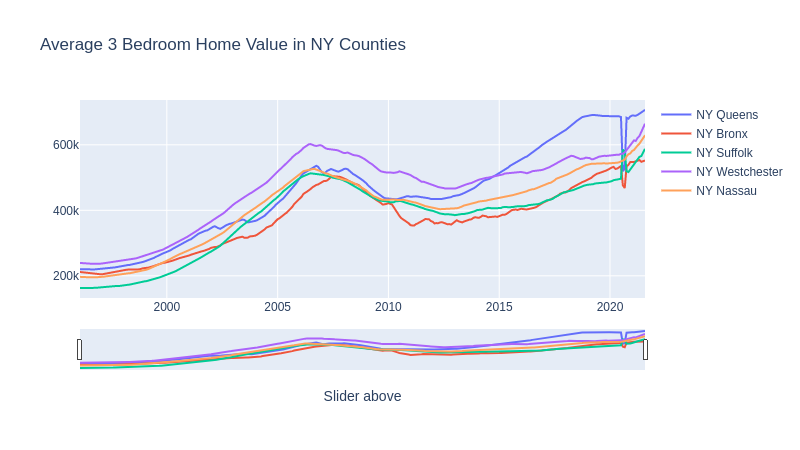

In [96]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=queens.date, y=queens.value, name = 'NY Queens'))
graph.add_trace(go.Scatter(x=bronx.date, y=bronx.value, name = 'NY Bronx'))
graph.add_trace(go.Scatter(x=suffolk.date, y=suffolk.value, name = 'NY Suffolk'))
graph.add_trace(go.Scatter(x=westchester.date, y=westchester.value, name = 'NY Westchester'))
graph.add_trace(go.Scatter(x=nassau.date, y=nassau.value, name = 'NY Nassau'))
graph.update_layout(title="Average 3 Bedroom Home Value in NY Counties")
graph.update_xaxes(rangeslider_visible=True, title = 'Slider above')
#graph.show()
gitly.show(graph)

In [97]:
## indicators
# condos - ZCON
# single family homes - ZSFH
# 5+ bedroom homes - Z5BR
# For-Sale Inventory (Raw, All Homes, Monthly) - IRAM

### 5+ bedroom Homes Market Value data from 1996 - 2021 in several NY counties

In [98]:
queens = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z5BR', region_id='62120')
bronx = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z5BR', region_id='401')
westchester = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z5BR', region_id='3148')
suffolk = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z5BR', region_id='2046')
nassau =  nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='Z5BR', region_id='1252')

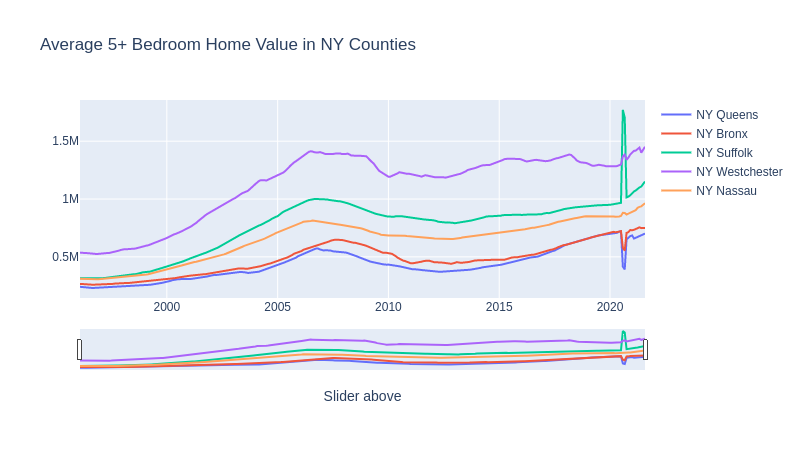

In [99]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=queens.date, y=queens.value, name = 'NY Queens'))
graph.add_trace(go.Scatter(x=bronx.date, y=bronx.value, name = 'NY Bronx'))
graph.add_trace(go.Scatter(x=suffolk.date, y=suffolk.value, name = 'NY Suffolk'))
graph.add_trace(go.Scatter(x=westchester.date, y=westchester.value, name = 'NY Westchester'))
graph.add_trace(go.Scatter(x=nassau.date, y=nassau.value, name = 'NY Nassau'))
graph.update_layout(title="Average 5+ Bedroom Home Value in NY Counties")
graph.update_xaxes(rangeslider_visible=True, title = 'Slider above')
#graph.show()
gitly.show(graph)

### Condominiums Market Value Data from 1996 - 2021 in several NY Counties

In [100]:
queens = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='1347')
bronx = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='401')
westchester = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='3148')
suffolk = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='2046')
nassau =  nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZCON', region_id='1252')

In [101]:
queens.head()

,indicator_id,region_id,date,value
None,,,,
0,ZCON,1347,2021-07-31,357661.0
1,ZCON,1347,2021-06-30,355743.0
2,ZCON,1347,2021-05-31,354825.0
3,ZCON,1347,2021-04-30,354534.0
4,ZCON,1347,2021-03-31,354936.0


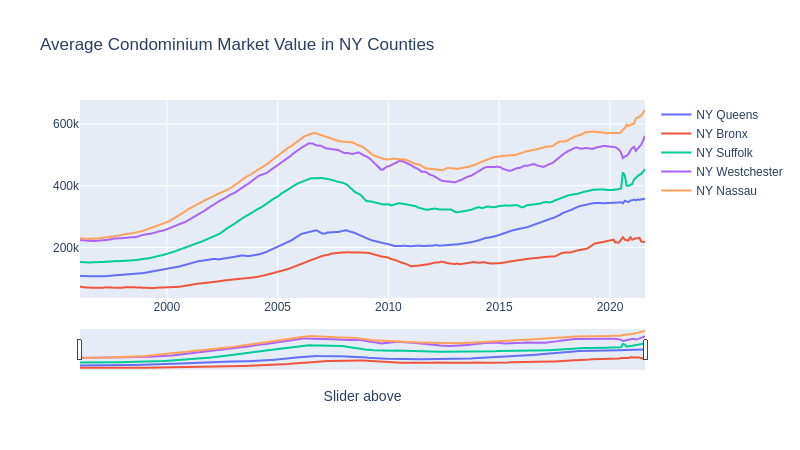

In [102]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=queens.date, y=queens.value, name = 'NY Queens'))
graph.add_trace(go.Scatter(x=bronx.date, y=bronx.value, name = 'NY Bronx'))
graph.add_trace(go.Scatter(x=suffolk.date, y=suffolk.value, name = 'NY Suffolk'))
graph.add_trace(go.Scatter(x=westchester.date, y=westchester.value, name = 'NY Westchester'))
graph.add_trace(go.Scatter(x=nassau.date, y=nassau.value, name = 'NY Nassau'))
graph.update_layout(title="Average Condominium Market Value in NY Counties")
graph.update_xaxes(rangeslider_visible=True, title = 'Slider above')
#graph.show()
gitly.show(graph)

### Top-Tier Homes Market Value Data from 1996 - 2021 in several NY Counties

In [103]:
queens = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id='1347')
bronx = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id='401')
westchester = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id='3148')
suffolk = nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id='2046')
nassau =  nasdaqdatalink.get_table('ZILLOW/DATA', indicator_id='ZATT', region_id='1252')

In [104]:
queens.head()

,indicator_id,region_id,date,value
None,,,,
0,ZATT,1347,2021-07-31,862879.0
1,ZATT,1347,2021-06-30,859662.0
2,ZATT,1347,2021-05-31,856060.0
3,ZATT,1347,2021-04-30,852945.0
4,ZATT,1347,2021-03-31,850939.0


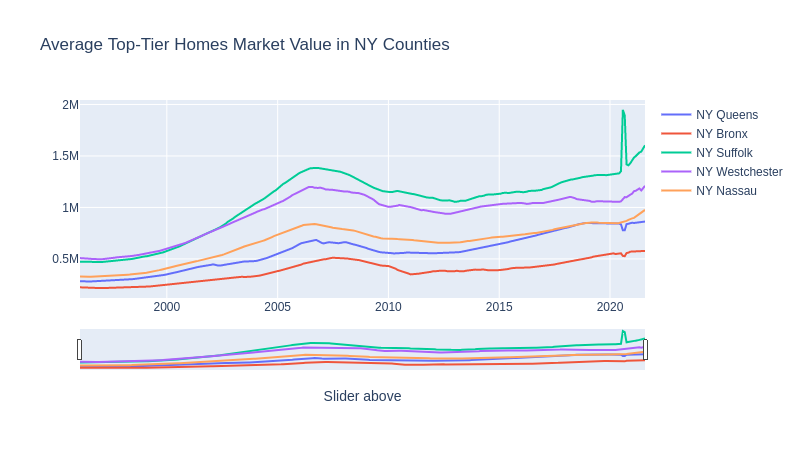

In [105]:
graph = go.Figure()
graph.add_trace(go.Scatter(x=queens.date, y=queens.value, name = 'NY Queens'))
graph.add_trace(go.Scatter(x=bronx.date, y=bronx.value, name = 'NY Bronx'))
graph.add_trace(go.Scatter(x=suffolk.date, y=suffolk.value, name = 'NY Suffolk'))
graph.add_trace(go.Scatter(x=westchester.date, y=westchester.value, name = 'NY Westchester'))
graph.add_trace(go.Scatter(x=nassau.date, y=nassau.value, name = 'NY Nassau'))
graph.update_layout(title="Average Top-Tier Homes Market Value in NY Counties")
graph.update_xaxes(rangeslider_visible=True, title = 'Slider above')
#graph.show()
gitly.show(graph)

In [106]:
### For-Sale Homes Inventory Data from 1996 - 2021 in several NY Counties